In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# read the dataset
train_data  = pd.read_csv("/gdrive/MyDrive/Nhập môn CV/train.csv")
train_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
test_data   = pd.read_csv("/gdrive/MyDrive/Nhập môn CV/test.csv")
test_data  .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [ ]:
# head
train_data .head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


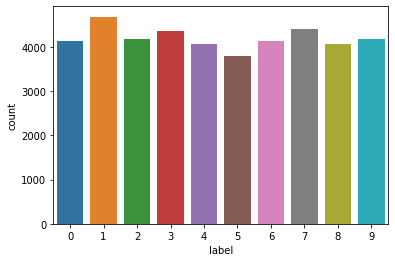

In [ ]:
## Visualizing the number of class and counts in the datasets

sns.countplot(train_data["label"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

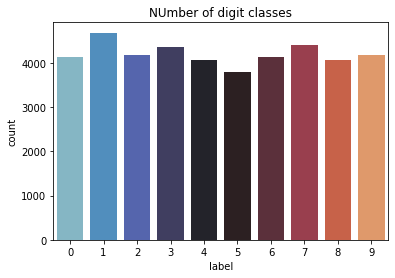

In [ ]:
## Visualizing the number of class and counts in the datasets

plt.plot(figure = (16,10))
g = sns.countplot( train_data["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
train_data.label.astype('category').value_counts()

#111


Text(0.5, 1.0, 'Digit 4')

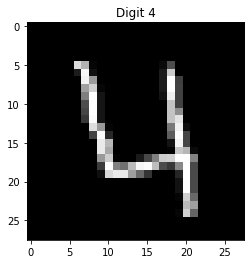

In [ ]:
# Plotting some samples as well as converting into matrix

four = train_data.iloc[3, 1:]
four.shape

four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 7')

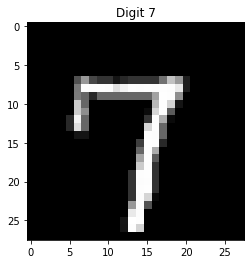

In [ ]:
seven = train_data.iloc[6, 1:]
seven.shape
seven = seven.values.reshape(28, 28)
plt.imshow(seven, cmap='gray')
plt.title("Digit 7")

Text(0.5, 1.0, 'Digit 0')

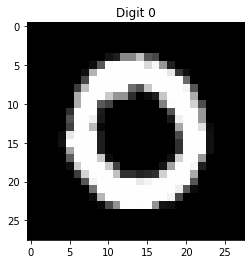

In [ ]:
zero = train_data.iloc[1, 1:]
zero.shape
zero = zero.values.reshape(28, 28)
plt.imshow(zero, cmap='gray')
plt.title("Digit 0")

<Figure size 432x288 with 0 Axes>

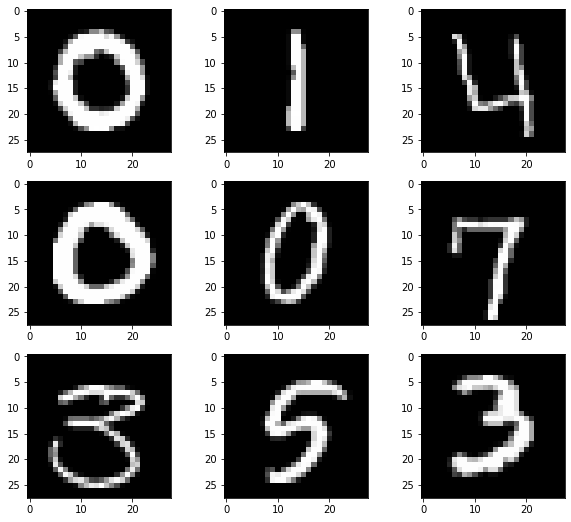

In [ ]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size

for i in range(9):
  plt.subplot(3,3,i+1)
  a = train_data.iloc[i+1, 1:]
  a = a.values.reshape(28,28)
  plt.imshow(a, cmap='gray')

In [ ]:
# visualise the array
print(four[5:-5, 5:-5])

[[  0 220 179   6   0   0   0   0   0   0   0   0   9  77   0   0   0   0]
 [  0  28 247  17   0   0   0   0   0   0   0   0  27 202   0   0   0   0]
 [  0   0 242 155   0   0   0   0   0   0   0   0  27 254  63   0   0   0]
 [  0   0 160 207   6   0   0   0   0   0   0   0  27 254  65   0   0   0]
 [  0   0 127 254  21   0   0   0   0   0   0   0  20 239  65   0   0   0]
 [  0   0  77 254  21   0   0   0   0   0   0   0   0 195  65   0   0   0]
 [  0   0  70 254  21   0   0   0   0   0   0   0   0 195 142   0   0   0]
 [  0   0  56 251  21   0   0   0   0   0   0   0   0 195 227   0   0   0]
 [  0   0   0 222 153   5   0   0   0   0   0   0   0 120 240  13   0   0]
 [  0   0   0  67 251  40   0   0   0   0   0   0   0  94 255  69   0   0]
 [  0   0   0   0 234 184   0   0   0   0   0   0   0  19 245  69   0   0]
 [  0   0   0   0 234 169   0   0   0   0   0   0   0   3 199 182  10   0]
 [  0   0   0   0 154 205   4   0   0  26  72 128 203 208 254 254 131   0]
 [  0   0   0   0  61 254

In [ ]:
print(seven[5:-5, 5:-5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  82 152  71  51  51  21  41  51  51  51  51 113 193 152  30   0   0]
 [  0 122 253 252 253 252 223 243 253 252 253 252 253 252 233  30   0   0]
 [  0 123 102  41 102 102 102 102 102 102 102 162 254 253 142   0   0   0]
 [  0 203 102   0   0   0   0   0   0   0   0 183 253 212  20   0   0   0]
 [  0 203 142   0   0   0   0   0   0   0  11 213 254  91   0   0   0   0]
 [ 41 243 102   0   0   0   0   0   0   0  51 252 172  10   0   0   0   0]
 [ 41 223 102   0   0   0   0   0   0   0 214 253 102   0   0   0   0   0]
 [  0  20  20   0   0   0   0   0   0   0 253 252 102   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  62 254 253  41   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 102 253 171   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 163 254  91   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [ ]:
print(zero[5:-5, 5:-5])

[[  0   0   0  13  86 250 254 254 254 254 217 246 151  32   0   0   0   0]
 [  0   0  16 179 254 254 254 254 254 254 254 254 254 231  54  15   0   0]
 [  0   0  72 254 254 254 254 254 254 254 254 254 254 254 254 104   0   0]
 [  0  61 191 254 254 254 254 254 109  83 199 254 254 254 254 243  85   0]
 [  0 172 254 254 254 202 147 147  45   0  11  29 200 254 254 254 171   0]
 [  1 174 254 254  89  67   0   0   0   0   0   0 128 252 254 254 212  76]
 [ 47 254 254 254  29   0   0   0   0   0   0   0   0  83 254 254 254 153]
 [ 80 254 254 240  24   0   0   0   0   0   0   0   0  25 240 254 254 153]
 [ 64 254 254 186   7   0   0   0   0   0   0   0   0   0 166 254 254 224]
 [232 254 254 254  29   0   0   0   0   0   0   0   0   0  75 254 254 254]
 [254 254 254 254  29   0   0   0   0   0   0   0   0   0  48 254 254 254]
 [163 254 254 254  29   0   0   0   0   0   0   0   0   0  48 254 254 254]
 [ 94 254 254 254 200  12   0   0   0   0   0   0   0  16 209 254 254 150]
 [ 15 206 254 254 254 202

#Data Preparation**

Let's conduct some data preparation steps before modeling. Firstly, let's see if it is important to rescale the features, since they may have varying ranges.

In [ ]:
# average feature values
round(train_data.drop('label', axis=1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In [ ]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)

(42000, 785)


In [ ]:
## Normalization

X_nor = X/255.0
test_data_nor = test_data/255.0

print("X:", X_nor.shape)
print("test_data:", test_data_nor.shape)

X: (42000, 784)
test_data: (28000, 784)


In [ ]:
## Non-Normalize

X_non = X
test_data_non = test_data

print("X_non:", X_non.shape)
print("test_data_non:", test_data_non.shape)

X_non: (42000, 784)
test_data_non: (28000, 784)


In [ ]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X_nor)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8400, 784)
(12600, 784)
(8400,)
(12600,)


In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
# scaling the features with non-normalize
from sklearn.preprocessing import scale
X_scaled_non = scale(X_non)

# train test split
X_train_non, X_test_non, y_train_non, y_test_non = train_test_split(X_scaled_non, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8400, 784)
(12600, 784)
(8400,)
(12600,)


#Model Building**

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [ ]:
import itertools

def plot_confusion_matrix(cm,classes,normalize = False, title = 'Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/ cm.sum(axis = 1)[:, np.newaxis]
    print("Normalize Confusion Matrix")
  else:
    print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j,i, format(cm[i, j], fmt),
               horizontalalignment = "center",
               color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel(' Predicted Label')

#Linear SVM

Let's first try building a linear SVM model (i.e. a linear kernel).

With normalize data

In [ ]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# predict
y_pred = svm_linear.predict(X_test)

In [ ]:
y_pred[:10]

array([7, 3, 9, 8, 6, 9, 7, 7, 4, 6])

accuracy: 0.9133333333333333 

Confusion matrix, without normalization
[[1160    0    0    1    6    6   12    1    1    1]
 [   0 1389    3    4    3    0    0    2   12    0]
 [   9   11 1146   38   11    4   10   12   17    2]
 [   5    4   35 1204    0   51    2    3   21    6]
 [   3    3   20    3 1132    1   10    4    2   40]
 [   9   17   10   67    7  997   14    2   19    7]
 [  15    2   15    0    9   15 1160    1    2    0]
 [   5   12   18    9   26    2    1 1212    3   42]
 [   8   31   24   45    8   61    9   14 1002   15]
 [   9    6    7   28   56    3    0   53    7 1106]]


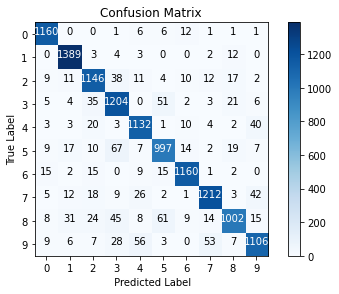

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
cm = (metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

plot_confusion_matrix(cm,["0","1","2","3","4","5","6","7","8","9"], normalize = False)


With non-normalize data

In [ ]:
# an initial SVM model with linear kernel   
svm_linear_non = svm.SVC(kernel='linear')

# fit
svm_linear_non.fit(X_train_non, y_train_non)

SVC(kernel='linear')

In [ ]:
# predict
y_pred_non = svm_linear.predict(X_test_non)

In [ ]:
y_pred[:10]

array([7, 3, 9, 8, 6, 9, 7, 7, 4, 6])

accuracy: 0.9133333333333333 

Confusion matrix, without normalization
[[1160    0    0    1    6    6   12    1    1    1]
 [   0 1389    3    4    3    0    0    2   12    0]
 [   9   11 1146   38   11    4   10   12   17    2]
 [   5    4   35 1204    0   51    2    3   21    6]
 [   3    3   20    3 1132    1   10    4    2   40]
 [   9   17   10   67    7  997   14    2   19    7]
 [  15    2   15    0    9   15 1160    1    2    0]
 [   5   12   18    9   26    2    1 1212    3   42]
 [   8   31   24   45    8   61    9   14 1002   15]
 [   9    6    7   28   56    3    0   53    7 1106]]


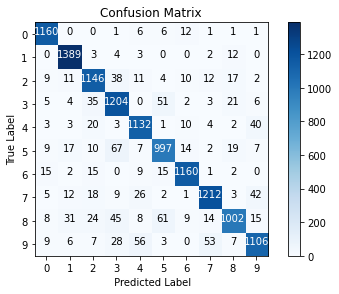

In [ ]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test_non, y_pred=y_pred_non), "\n")

# cm
cm = (metrics.confusion_matrix(y_true=y_test_non, y_pred=y_pred_non))

plot_confusion_matrix(cm,["0","1","2","3","4","5","6","7","8","9"], normalize = False)

#Non-Linear SVM

Let's now try a non-linear model with the RBF kernel.

In [ ]:
# rbf kernel with other hyperparameters kept to default 
non_linear_model = svm.SVC(kernel='rbf')

non_linear_model.fit(X_train, y_train)

SVC()

In [ ]:
# predict
y_pred = non_linear_model.predict(X_test)
y_pred[:10]

array([7, 3, 9, 8, 6, 9, 7, 7, 4, 6])

accuracy: 0.9348412698412698 

Confusion matrix, without normalization
[[1156    0    5    1    0    2   12    6    5    1]
 [   0 1389    4    3    4    0    2    6    5    0]
 [   2    4 1170   19    5    0    9   35   15    1]
 [   1    4   19 1237    0   20    2   32   13    3]
 [   0    4   25    0 1133    0    9   17    3   27]
 [   1    9    5   42    3 1047   17   11    8    6]
 [  13    2    5    0    2   15 1156   24    2    0]
 [   3   10    9    3   15    0    0 1256    1   33]
 [   5   19   14   25    7   21    8   15 1095    8]
 [   4    4    6   30   23    2    1   61    4 1140]]


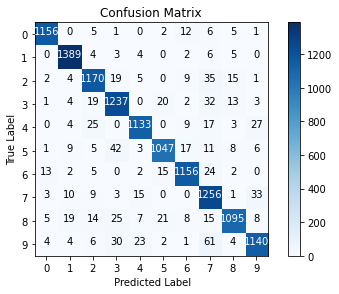

In [ ]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
cm = (metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

plot_confusion_matrix(cm,["0","1","2","3","4","5","6","7","8","9"], normalize = False)

#Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [ ]:
from sklearn.model_selection import KFold

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,24.843294,0.101863,8.127306,0.089533,5,0.01,"{'C': 5, 'gamma': 0.01}",0.755357,0.757143,0.779167,...,0.766667,0.011536,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,5.142017,0.029398,4.275874,0.060667,5,0.001,"{'C': 5, 'gamma': 0.001}",0.936310,0.945238,0.946429,...,0.944524,0.004508,2,0.996875,0.996577,0.996429,0.996875,0.996280,0.996607,0.000238
2,4.764080,0.026330,4.291477,0.289251,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.914286,0.925595,0.922024,...,0.922976,0.007169,4,0.950446,0.950893,0.950000,0.947768,0.947619,0.949345,0.001379
3,24.840463,0.090693,8.184612,0.040115,10,0.01,"{'C': 10, 'gamma': 0.01}",0.755357,0.757143,0.779167,...,0.766667,0.011536,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,5.143305,0.047553,3.994054,0.269924,10,0.001,"{'C': 10, 'gamma': 0.001}",0.933929,0.945238,0.947024,...,0.944881,0.005815,1,0.999405,0.999405,0.999405,0.999405,0.999405,0.999405,0.000000
5,3.971116,0.046491,3.896980,0.089018,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.911310,0.928571,0.927976,...,0.926071,0.009278,3,0.963542,0.964137,0.963839,0.961607,0.959524,0.962530,0.001744


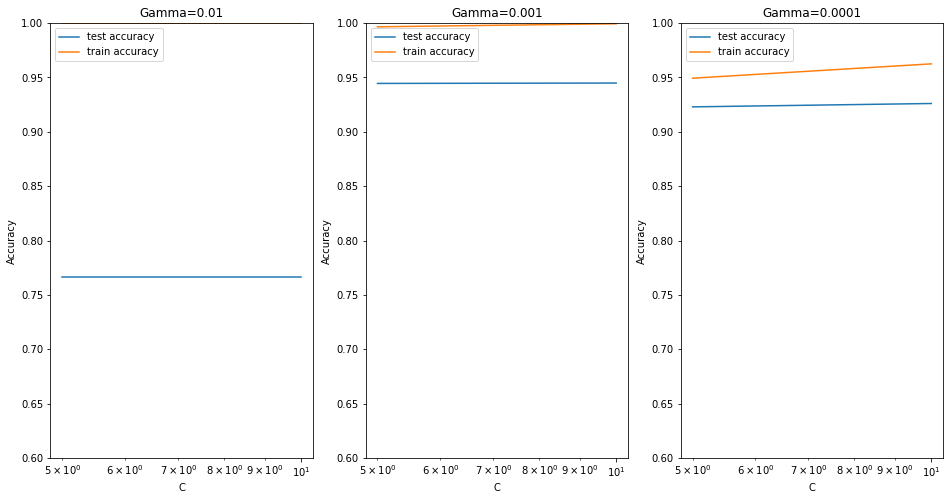

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9448809523809523 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


#Final 1.1

accuracy 0.9438888888888889 

Confusion matrix, without normalization
[[1163    0    4    1    1    2    8    6    3    0]
 [   0 1389    4    2    4    0    1    9    4    0]
 [   1    4 1184   14    5    1    9   30    7    5]
 [   0    3   15 1263    0   14    2   23    8    3]
 [   1    2   20    3 1149    0   10   10    2   21]
 [   2    8    3   30    4 1064   15    9   11    3]
 [   8    1    3    0    3   13 1167   23    1    0]
 [   4    9   10    8   12    0    0 1255    2   30]
 [   5   18   17   23    8   20    5   13 1098   10]
 [   5    3    2   27   21    1    1   51    3 1161]]


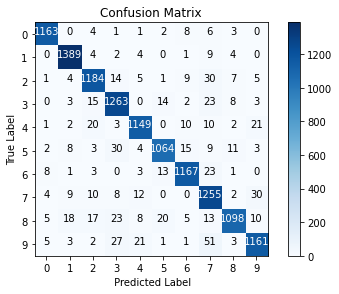

In [ ]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
# cm
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

plot_confusion_matrix(cm,["0","1","2","3","4","5","6","7","8","9"], normalize = False)

The accuracy achieved using a non-linear kernel (0.94) is mush higher than that of a linear one (0.91). We can conclude that the problem is highly non-linear in nature.

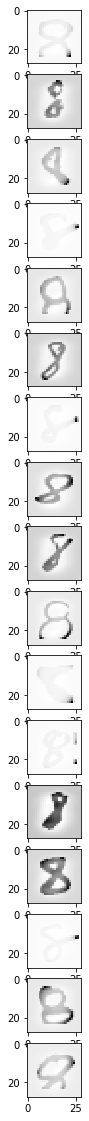

In [ ]:
idx = np.where((y_pred == 2) &(y_test == 8))[0]
fig = plt.figure(figsize=(5, 20))
for i in range(len(idx)):
  ax = fig.add_subplot(len(idx),1,i+1)
  imgplot = ax.imshow(np.reshape(X_test[idx[i],:], (28,28)), cmap=plt.cm.get_cmap("Greys"))
  imgplot.set_interpolation("nearest")
plt.show()

In [ ]:
cl_report = metrics.classification_report(y_test, y_pred)
print(cl_report)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1188
           1       0.97      0.98      0.97      1413
           2       0.94      0.94      0.94      1260
           3       0.92      0.95      0.93      1331
           4       0.95      0.94      0.95      1218
           5       0.95      0.93      0.94      1149
           6       0.96      0.96      0.96      1219
           7       0.88      0.94      0.91      1330
           8       0.96      0.90      0.93      1217
           9       0.94      0.91      0.93      1275

    accuracy                           0.94     12600
   macro avg       0.95      0.94      0.94     12600
weighted avg       0.94      0.94      0.94     12600



#Trường hợp data không normalize

accuracy 0.9992857142857143 

Confusion matrix, without normalization
[[883   0   0   0   0   0   0   0   0   0]
 [  0 903   0   0   0   0   0   0   0   0]
 [  0   0 855   0   0   0   0   0   0   0]
 [  0   0   0 880   0   1   0   0   0   0]
 [  0   0   0   0 758   0   0   0   0   2]
 [  0   0   0   0   0 745   0   0   0   0]
 [  0   0   0   0   0   0 842   0   0   0]
 [  0   1   0   0   0   0   0 886   0   0]
 [  0   0   0   0   0   0   0   0 815   0]
 [  0   0   0   0   0   0   0   2   0 827]]


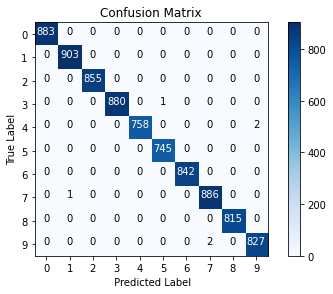

In [ ]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)

# metrics
print("accuracy", metrics.accuracy_score(y_train, y_pred_train), "\n")
# cm
cm = metrics.confusion_matrix(y_true=y_train, y_pred=y_pred_train)

plot_confusion_matrix(cm,["0","1","2","3","4","5","6","7","8","9"], normalize = False)